# Visualizing Grades Analysis
Teo Zeng

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
grades = pd.read_csv("grades.csv")
grades.columns

Index(['Quarter', 'Course_Level', 'Course', 'Instructor', 'Grade_Given',
       'Sum_of_Student_Count'],
      dtype='object')

Finding unique values in a column

In [12]:
instructor_list = grades["Instructor"].unique()
quarter_list = grades["Quarter"].unique()
course_level_list = grades["Course_Level"].unique()
course_list = grades["Course"].unique()

What professor most likely to give A's? We consider A,A-,A+ are all A's.

In [30]:
rate = {}
for instructor in instructor_list:
    df = grades.loc[grades['Instructor'] == instructor]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students == 0:
        rate[instructor] = 0
        continue
    df_A = df.loc[(df['Grade_Given'] == "A") | (df['Grade_Given'] == "A-") | (df['Grade_Given'] == "A+")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    rate[instructor] = number_of_A_students / total_students
sorted_rate = dict(sorted(rate.items(), key=lambda x: x[1], reverse=True))

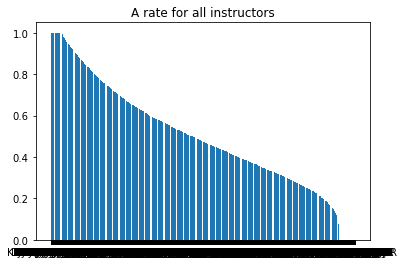

In [33]:
plt.bar(range(len(sorted_rate)), list(sorted_rate.values()), align='center')
plt.xticks(range(len(sorted_rate)), list(sorted_rate.keys()))
plt.title("A rate for all instructors")
plt.show()